# k-NN Classification on Iris Dataset using Cross Validation to select optimal K value

Goals:
- Using cross validation to select the optimal K for a k-nearest neighbor classification from the popular iris data set

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split 
from sklearn.decomposition import TruncatedSVD
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [120]:
#loading iris data set
iris = sklearn.datasets.load_iris()

X = iris.data
Y = iris.target

print(X.shape, Y.shape)

(150, 4) (150,)


Splitting data into train and test data. I want 33% of my data to be testing data

In [121]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.33, random_state=42)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(100, 4) (100,)
(50, 4) (50,)


Reducing dimensionality from 4 to 2 using SVD

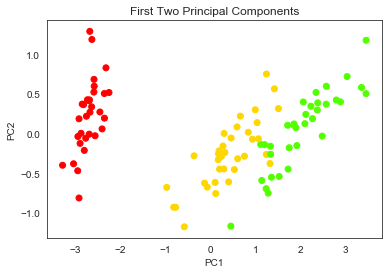

In [143]:
#projections to the first two principal components of the data
#creatomg svd object
svd = TruncatedSVD(n_components = 2)
#centering the data
X_train_centered  = X_train - X_train.mean(axis=0)
#performing svd. should return in this form (n_samples,n_components)
x2d = svd.fit_transform(X_train_centered)
plt.scatter(x2d[:,0], x2d[:,1], c=y_train,cmap=plt.cm.prism)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("First Two Principal Components")
plt.show()

Using ten fold cross validation to estimate the optimal value for k

In [183]:
#creating KNN model
knn = KNeighborsClassifier()
#creating a dictionary
param_grid = {'n_neighbors':np.arange(1,20)}
#using gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn,param_grid,cv=10)
#fit model to data
knn_gscv.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

(0.915, 0.945)

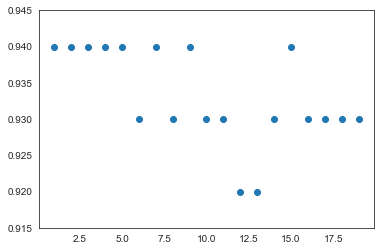

In [184]:
plt.scatter(knn_gscv.param_grid['n_neighbors'],knn_gscv.cv_results_['mean_test_score'])
plt.ylim([0.915,0.945])

In [185]:
knn_gscv.best_params_

{'n_neighbors': 1}

In [189]:
#using the k value given by the grid search and testing the performance score
knn_gscv.best_estimator_.score(X_test,y_test)

0.98